In [81]:
import networkx as nx
import collections
import networkx.algorithms.community as com

In [491]:
G1 = nx.barbell_graph(3, 0)

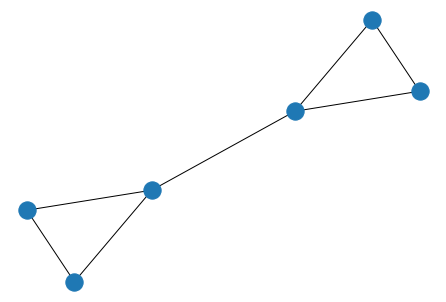

In [493]:
nx.draw(G1)

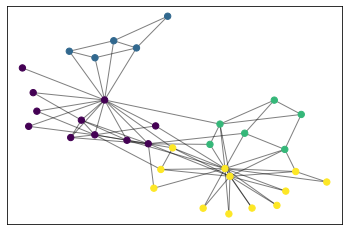

In [490]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

# load the karate club graph
G = nx.karate_club_graph()

#first compute the best partition
partition = community_louvain.best_partition(G)

# compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [487]:
#partition
cc = dict()
for key, value in partition.items():
        if value in cc:
            cc[value].add(key)
        else:
            cc[value] = {key}

In [488]:
com.modularity(G, list(cc.values()))

0.41978961209730437

In [432]:
def cur_com(G):
    coms = {i:G.nodes[i]['set'] for i in list(G.nodes())}
    cur_coms = dict()
    for key, value in coms.items():
        if value in cur_coms:
            cur_coms[value].add(key)
        else:
            cur_coms[value] = {key}
    return cur_coms

def gma(G, node, params):
    funcs = []
    G1 = nx.Graph(G)
    mod_now = com.modularity(G1, list(cur_com(G1).values()))
    for i in params:
        G1.nodes[node]['set'] = G1.nodes[i]['set']
        mod = com.modularity(G1, list(cur_com(G1).values()))
        funcs.append(mod)
    kost = dict(zip(funcs, params))
    G1.nodes[node]['set'] = G1.nodes[kost[max(kost)]]['set']

    if node == kost[max(kost)]:
        return node
    else:
        return kost[max(kost)]

    
def alho(G, first=False):
    part = dict()
    
    if first:    
        for i in list(G.nodes()):
            G.nodes[i]['set'] = i
        for i in list(G.edges()):
            G[i[0]][i[1]]['weight'] = 1
        
    flag = True
    while flag:
        cur = list(cur_com(G).values())

        for i in list(G.nodes()):
            G.nodes[i]['set'] = G.nodes[gma(G, i, list(G.neighbors(i)))]['set']
        if list(cur_com(G).values()) == cur:
            flag = False
    return (com.modularity(G, cur_com(G).values()),G)

In [482]:
def superg(G):
    part = cur_com(G)
    

    stb = dict()
    for key,i in part.items():
        for key2,j in part.items():
            st = 0
            for ii in i:
                for jj in j:
                    if (ii,jj) in G.edges():
                        if key==key2 and ii != jj:
                            st += G[ii][jj]['weight']/2
                        else:
                            st += G[ii][jj]['weight']
            stb[(key,key2)] = st
    
    
    bt = dict()
    for i,j in stb.items():
        if (i[1], i[0]) in bt.keys() or j == 0:
            pass
        else:
            bt[i] = int(j)
    
    new_G = nx.Graph()
    for i,j in bt.items():
        new_G.add_edge(i[0], i[1], weight=int(j))
    
    for i in list(new_G.nodes()):
        new_G.nodes[i]['set'] = i
    
    return new_G

In [480]:
def louvain(G, prepaired=False):
    #first pass
    leng = len(G.nodes())
    G = alho(G, first=True)[1]
    print('After step 0.5:')
    print(f'Modularity = {com.modularity(G, cur_com(G).values())}')
    pos = nx.spring_layout(G)
    
    colors_sets = {i:i/leng for i in cur_com(G).keys()}
    colors = [colors_sets[G.nodes[i]['set']] for i in G.nodes()]

    labels1 = {i:G[i][i]['weight'] for i in list(nx.nodes_with_selfloops(G))}
    nx.draw(G, pos=pos, with_labels=True, labels=labels1, edge_color=str(0.5), node_color = colors)#, with_labels=True)
    
    plt.show()
    
    G = superg(G)
    
    print('After step 1:')
    print(f'Modularity = {com.modularity(G, cur_com(G).values())}')
    
    pos = nx.spring_layout(G)
    colors = [colors_sets[G.nodes[i]['set']] for i in G.nodes()]

    labels1 = {i:G[i][i]['weight'] for i in list(nx.nodes_with_selfloops(G))}
    nx.draw(G, pos=pos, with_labels=True, labels=labels1, edge_color=str(0.5), node_color = colors)#, with_labels=True)

    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)
    
    plt.show()
    
    
    numb = 1
    flag = True
    while flag:
        cur = list(cur_com(G).values())
        G = alho(G)[1]
        
        print(f'After step {(numb+0.5)}:')
        print(f'Modularity = {com.modularity(G, cur_com(G).values())}')
        pos = nx.spring_layout(G)
        
        colors = [colors_sets[G.nodes[i]['set']] for i in G.nodes()]

        labels1 = {i:G[i][i]['weight'] for i in list(nx.nodes_with_selfloops(G))}
        nx.draw(G, pos=pos, with_labels=True, labels=labels1, edge_color=str(0.5), node_color = colors)#, with_labels=True)
    
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)
        
        plt.show()
        
        #print(cur, cur_com(G).values())
        if list(cur_com(G).values()) == cur:
            flag = False
            print('Алгоритм завершился')
            break
        
        
        G = superg(G)
        
        print(f'After step {(numb+1)}:')
        print(f'Modularity = {com.modularity(G, cur_com(G).values())}')
        
        pos = nx.spring_layout(G)
        colors = [colors_sets[G.nodes[i]['set']] for i in G.nodes()]

        labels1 = {i:G[i][i]['weight'] for i in list(nx.nodes_with_selfloops(G))}
        nx.draw(G, pos=pos, with_labels=True, labels=labels1, edge_color=str(0.5), node_color = colors)#, with_labels=True)

        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)
    
        plt.show()
        
        if list(cur_com(G).values()) == cur:
            flag = False
            print('Алгоритм завершился')
            break
        
        numb+=1
        if len(G.nodes()) == 2:
            print('Алгоритм завершился')
            break
        

After step 0.5:
Modularity = 0.3613576594345825


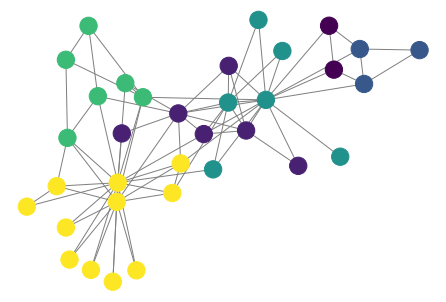

After step 1:
Modularity = 0.3613576594345825


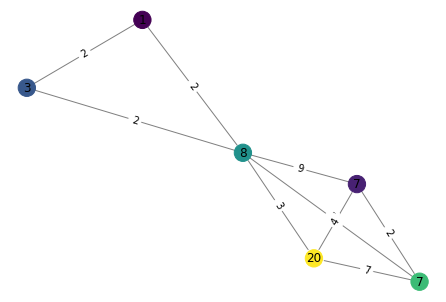

After step 1.5:
Modularity = 0.40203813280736356


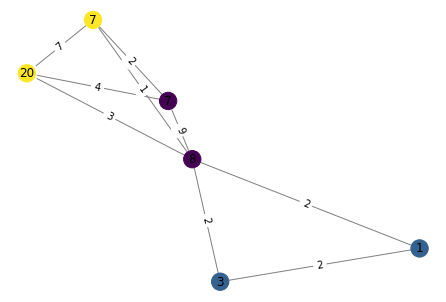

After step 2:
Modularity = 0.40203813280736356


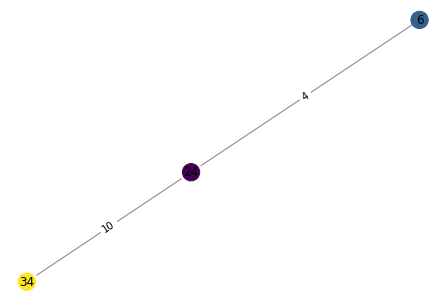

After step 2.5:
Modularity = 0.40203813280736356


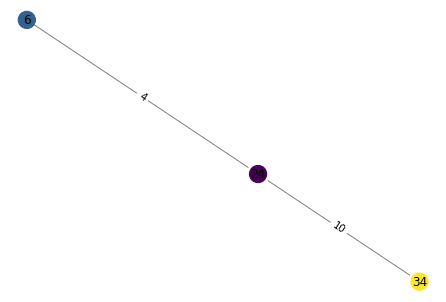

Алгоритм завершился


In [489]:
louvain(G)

After step 0.5:
Modularity = 0.35714285714285715


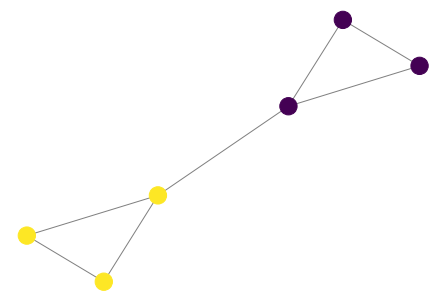

After step 1:
Modularity = 0.35714285714285715


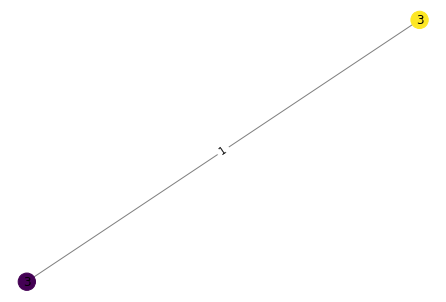

After step 1.5:
Modularity = 0.35714285714285715


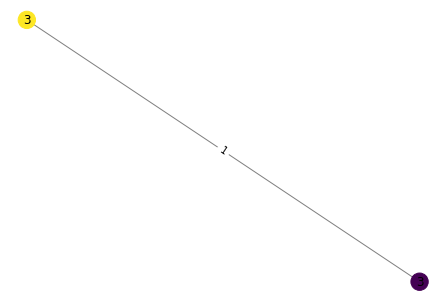

Алгоритм завершился


In [494]:
louvain(G1)

In [500]:
G2 = nx.complete_graph(6)
G2.add_edge(1,10)
G2.add_edge(11,10)

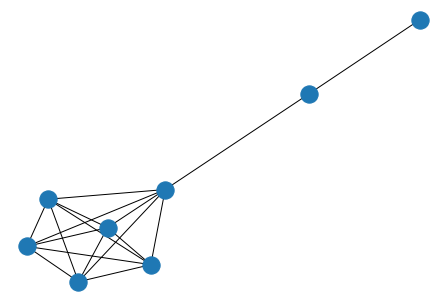

In [501]:
nx.draw(G2)

After step 0.5:
Modularity = 0.102076124567474


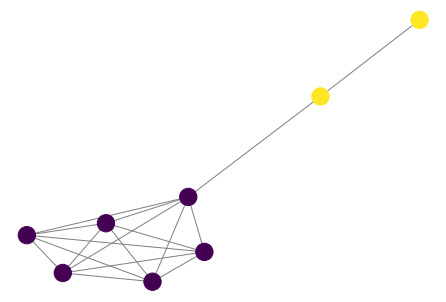

After step 1:
Modularity = 0.102076124567474


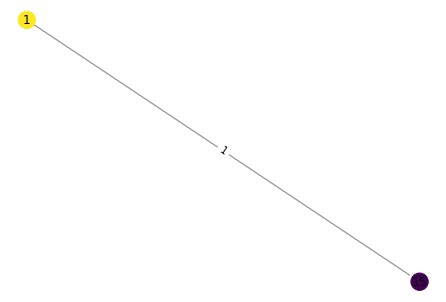

After step 1.5:
Modularity = 0.102076124567474


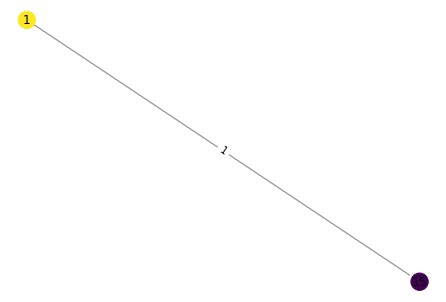

Алгоритм завершился


In [502]:
louvain(G2)